<a href="https://colab.research.google.com/github/YJJasdasdasd/deeplearning/blob/master/LSTM%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%B4_%EB%A1%9C%EC%9D%B4%ED%84%B0_%EB%89%B4%EC%8A%A4_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 데이터를 불러와 학습셋, 테스트셋으로로 나눕니다다
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사:')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사:
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
# 단어의 수를 맞추어 줍니다.
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [4]:
# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [6]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 학습의 조기 중단을 설정합니다.


In [8]:
# 모델을 실행합니다.
history = model.fit(x_train, y_train, batch_size=20, epochs=200, validation_data=(x_test, y_test), callbacks=[stop])

Epoch 1/200
450/450 [==============================] - 11s 10ms/step - loss: 2.2543 - accuracy: 0.4205 - val_loss: 2.0379 - val_accuracy: 0.4524
Epoch 2/200
450/450 [==============================] - 4s 8ms/step - loss: 1.8499 - accuracy: 0.5206 - val_loss: 1.8224 - val_accuracy: 0.5329
Epoch 3/200
450/450 [==============================] - 4s 8ms/step - loss: 1.6596 - accuracy: 0.5737 - val_loss: 1.6195 - val_accuracy: 0.5864
Epoch 4/200
450/450 [==============================] - 4s 8ms/step - loss: 1.5300 - accuracy: 0.6039 - val_loss: 1.5535 - val_accuracy: 0.5966
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.3675 - accuracy: 0.6554 - val_loss: 1.3663 - val_accuracy: 0.6527
Epoch 6/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2298 - accuracy: 0.6919 - val_loss: 1.3305 - val_accuracy: 0.6683
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.1210 - accuracy: 0.7185 - val_loss: 1.2196 - val_accuracy: 0.68

In [9]:
# 테스트 정확도를 출력합니다.
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.1812 - accuracy: 0.7257

 Test Accuracy: 0.7257


In [10]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

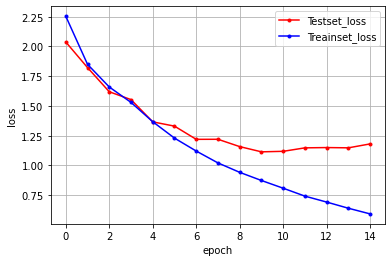

In [13]:
# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue', label='Treainset_loss')
# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()